In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [9]:
df = pd.read_csv("tracks_features.csv")

df1 = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 13, 19, 20, 21, 22, 23]], axis=1)
df1

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0.470,0.978,-5.399,0.0727,0.02610,0.000011,0.3560,0.503
1,0.599,0.957,-5.764,0.1880,0.01290,0.000071,0.1550,0.489
2,0.315,0.970,-5.424,0.4830,0.02340,0.000002,0.1220,0.370
3,0.440,0.967,-5.830,0.2370,0.16300,0.000004,0.1210,0.574
4,0.426,0.929,-6.729,0.0701,0.00162,0.105000,0.0789,0.539
...,...,...,...,...,...,...,...,...
1204020,0.264,0.966,-6.970,0.0672,0.00935,0.002240,0.3370,0.415
1204021,0.796,0.701,-6.602,0.0883,0.10400,0.644000,0.0749,0.781
1204022,0.785,0.796,-5.960,0.0564,0.03040,0.918000,0.0664,0.467
1204023,0.665,0.856,-6.788,0.0409,0.00007,0.776000,0.1170,0.227


In [10]:
df1.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,4.930565e-01,5.095363e-01,-1.180870e+01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01
std,1.896694e-01,2.946839e-01,6.982132e+00,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01
min,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.560000e-01,2.520000e-01,-1.525400e+01,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01
50%,5.010000e-01,5.240000e-01,-9.791000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01
75%,6.330000e-01,7.660000e-01,-6.717000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01
max,1.000000e+00,1.000000e+00,7.234000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   danceability      1204025 non-null  float64
 1   energy            1204025 non-null  float64
 2   loudness          1204025 non-null  float64
 3   speechiness       1204025 non-null  float64
 4   acousticness      1204025 non-null  float64
 5   instrumentalness  1204025 non-null  float64
 6   liveness          1204025 non-null  float64
 7   valence           1204025 non-null  float64
dtypes: float64(8)
memory usage: 73.5 MB


In [20]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)
scaled_df

array([[-0.12156168,  1.5897166 ,  0.91801558, ..., -0.75169143,
         0.85559944,  0.27732973],
       [ 0.55856939,  1.51845377,  0.86573926, ..., -0.75153278,
        -0.25822706,  0.22557075],
       [-0.93877343,  1.56256886,  0.91443501, ..., -0.751715  ,
        -0.44109409, -0.21438062],
       ...,
       [ 1.53922349,  0.97210543,  0.83766759, ...,  1.68792467,
        -0.74919734,  0.1442352 ],
       [ 0.90654342,  1.17571351,  0.71907911, ...,  1.31055037,
        -0.46880122, -0.74306168],
       [ 1.28087913,  0.67348025,  0.36231113, ...,  0.03491897,
         0.42890969, -0.82809429]])

In [33]:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, max_iter=300, random_state=26)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=10, n_init=10, random_state=26)

In [34]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 26
}

sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

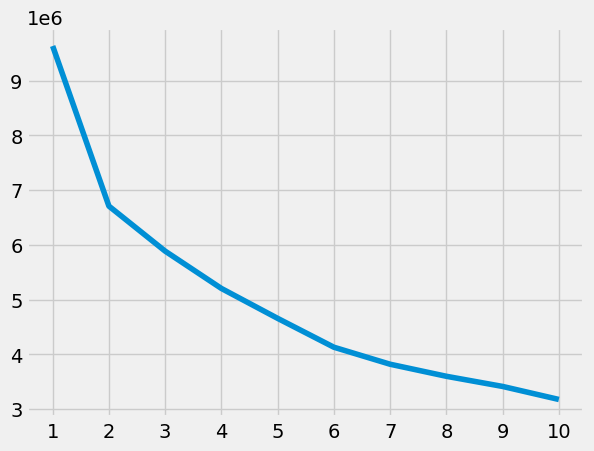

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.show()

In [24]:
print(kmeans.inertia_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

4656330.048152223
[[-0.44926541  0.9127844   0.66671783 -0.07726485 -0.91580107  0.04819264
   0.61743976 -0.35200546]
 [-0.99848741 -1.24882557 -1.47294776 -0.32006816  1.13732372  1.09125566
  -0.31859821 -0.91764375]
 [ 0.77812205  0.22468025  0.14474743  3.36493966 -0.16019732 -0.63629536
   0.60679009  0.37148029]
 [ 0.83445793  0.61652916  0.57491893 -0.11266735 -0.62011057 -0.36678088
  -0.23368285  0.93364938]
 [ 0.04580844 -0.66313631 -0.1488797  -0.30737945  0.75334257 -0.37547218
  -0.17189089 -0.15284046]]
11


In [36]:
clusters = kmeans.predict(scaled_df)
print(clusters)

[9 9 3 ... 5 5 9]


In [38]:
pca = PCA(n_components=2)
df2 = pca.fit_transform(scaled_df)

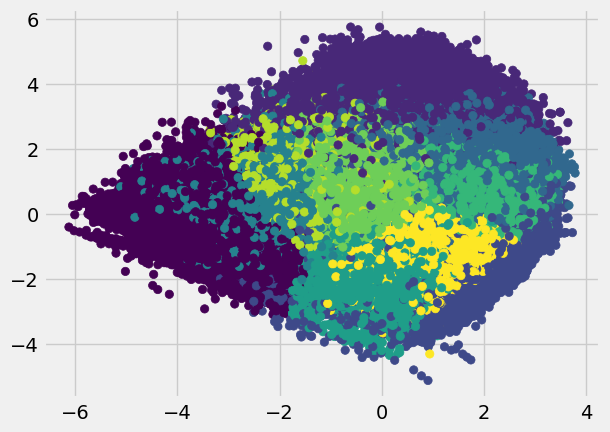

In [39]:
plt.scatter(df2[:,0], df2[:,1], c=clusters)
plt.show()